# Capstone Project

### Running linear regression, regression tree, random forest and XGBoost regression models on the Readmissions and Mortality data frames created in R. 

In [175]:
#Import libraries.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import sklearn.discriminant_analysis as DA
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')

In [176]:
#Set working directory. 
os.chdir("C:/Users/alexm/OneDrive/Desktop/UCLA Data Science Certification/Capstone Project")

In [177]:
#Import readmissions and mortality data.
readmissions = pd.read_excel('readmissions.xlsx')
mortality = pd.read_excel('mortality.xlsx')

In [178]:
readmissions.head()

,Year,County,Latitude,Longitude,Zipcode,OSHPDID,Hospital,Entity Type,Capacity (Number of Beds),Measure,...,Number of Total Admissions,Risk Adjusted Rate,Hospital Ratings,County Rank Health Factors,County Rank Health Outcomes,CHCI,Median Household Income Estimate,Poverty Rate,Population Estimate,Percent Age 65-84
0,2011-2012,Tulare,36.32753,-119.29345,90012,106190307,Kaweah Delta Medical Center,PROFIT CORP,138,30-day Readmission,...,454,13.23,As Expected,55,46,221.28,25028.0,33.7,29298.0,8.7
1,2011-2012,Los Angeles,34.08988,-118.14490,90015,106190125,Alhambra Hospital,NONPROFIT CORP,318,30-day Readmission,...,96,10.40,As Expected,38,26,189.67,25911.0,33.5,17957.0,4.3
2,2011-2012,Los Angeles,34.06826,-118.12302,90017,106190392,Garfield Medical Center,NONPROFIT CORP,380,30-day Readmission,...,304,15.64,As Expected,38,26,183.40,21050.0,46.1,22401.0,3.6
3,2011-2012,Los Angeles,34.02328,-118.39724,90023,106190198,Southern California Hospital At Culver City,PROFIT CORP,91,30-day Readmission,...,136,18.84,As Expected,38,26,151.20,33340.0,31.1,44706.0,3.7
4,2011-2012,Los Angeles,34.27910,-118.45951,90027,106190429,Providence Holy Cross Medical Center,NONPROFIT CORP,492,30-day Readmission,...,352,12.17,As Expected,38,26,320.99,47980.0,16.3,45491.0,8.0


In [179]:
mortality.head()

,Year,County,Latitude,Longitude,Zipcode,OSHPDID,Hospital,Entity Type,Capacity (Number of Beds),Measure,...,Number of Total Admissions,Risk Adjusted Rate,Hospital Ratings,County Rank Health Factors,County Rank Health Outcomes,CHCI,Median Household Income Estimate,Poverty Rate,Population Estimate,Percent Age 65-84
0,2011-2012,Ventura,34.274589,-119.258124,90004,106190784,Community Memorial Hospital - San Buenaventura,PROFIT CORP,170,30-day Mortality,...,333,9.78,As Expected,14,17,261.59,37839.0,19.8,63932.0,3.0
1,2011-2012,Tulare,36.327530,-119.293450,90012,106190307,Kaweah Delta Medical Center,PROFIT CORP,138,30-day Mortality,...,493,14.18,Worse,55,46,221.28,25028.0,33.7,29298.0,8.7
2,2011-2012,Los Angeles,34.689280,-118.157670,90015,106190125,Antelope Valley Hospital,NONPROFIT CORP,318,30-day Mortality,...,431,12.32,As Expected,38,26,189.67,25911.0,33.5,17957.0,4.3
3,2011-2012,Los Angeles,34.064640,-118.239050,90017,106190392,"Pacific Alliance Medical Center, Inc.",NONPROFIT CORP,380,30-day Mortality,...,88,2.60,Better,38,26,183.40,21050.0,46.1,22401.0,3.6
4,2011-2012,Los Angeles,34.068260,-118.123020,90017,106190392,Garfield Medical Center,NONPROFIT CORP,380,30-day Mortality,...,315,4.35,Better,38,26,183.40,21050.0,46.1,22401.0,3.6


In [180]:
readmissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  1079 non-null   object 
 1   County                                1079 non-null   object 
 2   Latitude                              1079 non-null   float64
 3   Longitude                             1079 non-null   float64
 4   Zipcode                               1079 non-null   int64  
 5   OSHPDID                               1079 non-null   int64  
 6   Hospital                              1079 non-null   object 
 7   Entity Type                           1079 non-null   object 
 8   Capacity (Number of Beds)             1079 non-null   int64  
 9   Measure                               1079 non-null   object 
 10  Number of 30 Day Readmissions/Deaths  1079 non-null   int64  
 11  Number of Total A

In [181]:
mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  1091 non-null   object 
 1   County                                1091 non-null   object 
 2   Latitude                              1091 non-null   float64
 3   Longitude                             1091 non-null   float64
 4   Zipcode                               1091 non-null   int64  
 5   OSHPDID                               1091 non-null   int64  
 6   Hospital                              1091 non-null   object 
 7   Entity Type                           1091 non-null   object 
 8   Capacity (Number of Beds)             1091 non-null   int64  
 9   Measure                               1091 non-null   object 
 10  Number of 30 Day Readmissions/Deaths  1091 non-null   int64  
 11  Number of Total A

In [182]:
#Drop any missing values in order to perform Regression Tree and XGBoost models.
print(readmissions.isnull().sum())
print(mortality.isnull().sum())

readmissions = readmissions.dropna(axis = 0)
mortality = mortality.dropna(axis = 0)

Year                                     0
County                                   0
Latitude                                 0
Longitude                                0
Zipcode                                  0
OSHPDID                                  0
Hospital                                 0
Entity Type                              0
Capacity (Number of Beds)                0
Measure                                  0
Number of 30 Day Readmissions/Deaths     0
Number of Total Admissions               0
Risk Adjusted Rate                       0
Hospital Ratings                         0
County Rank Health Factors               0
County Rank Health Outcomes              0
CHCI                                    11
Median Household Income Estimate        11
Poverty Rate                            11
Population Estimate                      4
Percent Age 65-84                       11
dtype: int64
Year                                    0
County                                  0


In [183]:
#Run linear Regression, Regression Rree, Random Forest, XGBoost Regression models for readmissions and mortality data. 

In [184]:
#Split readmissions and mortality data into train set and test set. 
trainr = (readmissions['Year'].isin(['2011-2012', '2012-2013', '2013-2014']))
testr = (readmissions['Year'] == '2014-2015')
train_setr = readmissions[trainr]
test_setr = readmissions[testr]

trainm = (mortality['Year'].isin(['2011-2012', '2012-2013', '2013-2014']))
testm = (mortality['Year'] == '2014-2015')
train_setm = mortality[trainm]
test_setm = mortality[testm]

feature_namesr = [readmissions.columns.tolist()[14]]
feature_namesr += readmissions.columns.tolist()[16:21]

feature_namesm = [mortality.columns.tolist()[14]]
feature_namesm += mortality.columns.tolist()[16:21]

In [185]:
#Linear Regression Model (readmissions):
y1_train = train_setr['Risk Adjusted Rate']
X1_train = train_setr[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]
y1_test = test_setr['Risk Adjusted Rate']
X1_test = test_setr[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]

X1_train = sm.add_constant(X1_train) 
lm1 = sm.OLS(y1_train, X1_train)
results1 = lm1.fit()
print(results1.summary()) #Adjusted R^2 = 0.07.

                            OLS Regression Results                            
Dep. Variable:     Risk Adjusted Rate   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     10.56
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           2.63e-11
Time:                        20:44:22   Log-Likelihood:                -2120.4
No. Observations:                 806   AIC:                             4255.
Df Residuals:                     799   BIC:                             4288.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [186]:
y2_train = train_setr['Risk Adjusted Rate']
X2_train = train_setr[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]
y2_test = test_setr['Risk Adjusted Rate']
X2_test = test_setr[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]

lm2 = LinearRegression() 
lm2 = lm2.fit(X2_train, y2_train)
y2_pred = lm2.predict(X2_test)
mse3 = mean_squared_error(y2_test, y2_pred)
print("Mean Squared Error: ", mse3)

Mean Squared Error:  9.814898117086445


In [187]:
#Linear Regression Model (mortality):
y0_train = train_setm['Risk Adjusted Rate']
X0_train = train_setm[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]
y0_test = test_setm['Risk Adjusted Rate']
X0_test = test_setm[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]

X0_train = sm.add_constant(X0_train) 
lm0 = sm.OLS(y0_train, X0_train)
results0 = lm0.fit()
print(results0.summary()) #Adjusted R^2 = 0.01.

                            OLS Regression Results                            
Dep. Variable:     Risk Adjusted Rate   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.557
Date:                Mon, 13 Mar 2023   Prob (F-statistic):             0.0185
Time:                        20:44:22   Log-Likelihood:                -2196.9
No. Observations:                 820   AIC:                             4408.
Df Residuals:                     813   BIC:                             4441.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [188]:
y_train = train_setm['Risk Adjusted Rate']
X_train = train_setm[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]
y_test = test_setm['Risk Adjusted Rate']
X_test = test_setm[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]

lm = LinearRegression() 
lm = lm.fit(X_train ,y_train)
y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  14.091927949629264


In [189]:
#Tree Regression Model (readmissions):
y3_train = train_setr['Risk Adjusted Rate']
X3_train = train_setr[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]
y3_test = test_setr['Risk Adjusted Rate']
X3_test = test_setr[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]

regressor3 = DecisionTreeRegressor(max_depth = 3, ccp_alpha = 0, random_state = 40)
regressor3.fit(X3_train, y3_train)
y3_pred = regressor3.predict(X3_test)
mse3 = mean_squared_error(y3_test, y3_pred)
print("Mean Squared Error: ", mse3)

Mean Squared Error:  9.529961860865624


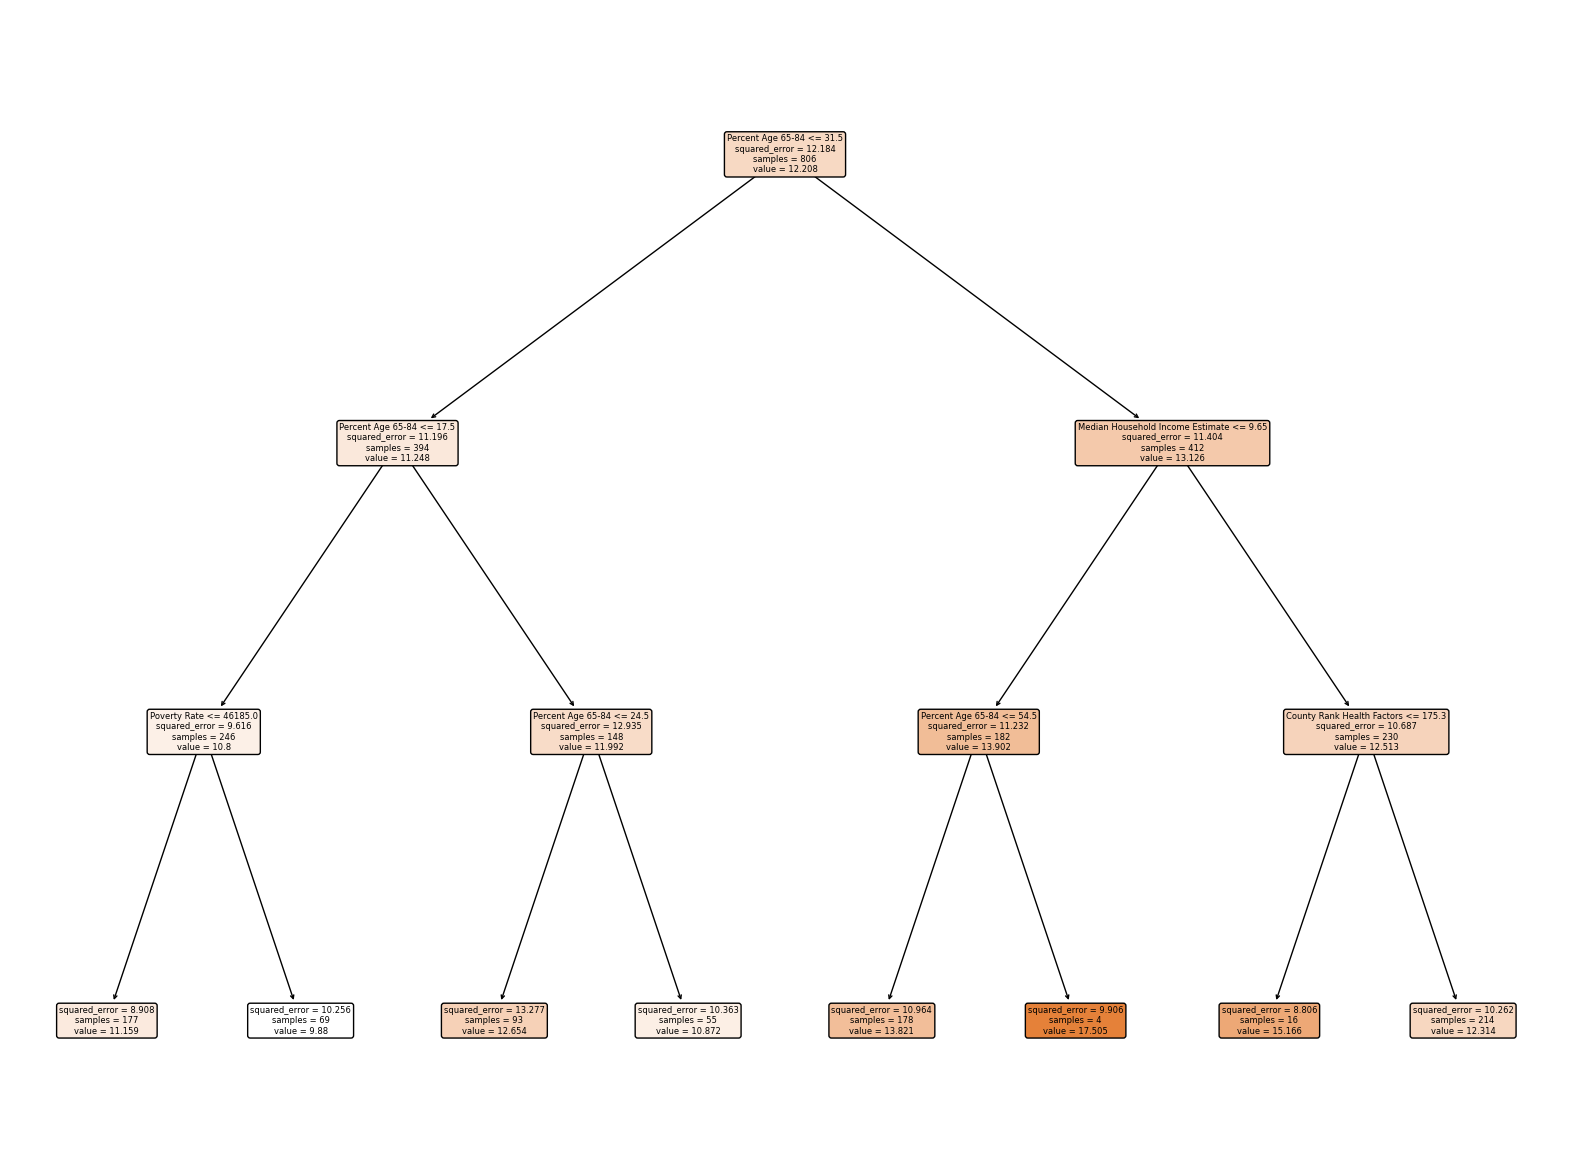

In [190]:
#Plot tree.
plt.figure(figsize = (20, 15))
plot_tree(regressor3, feature_names = feature_namesr, filled = True, rounded = True);

Text(0, 0.5, 'Test Accuracy Scores')

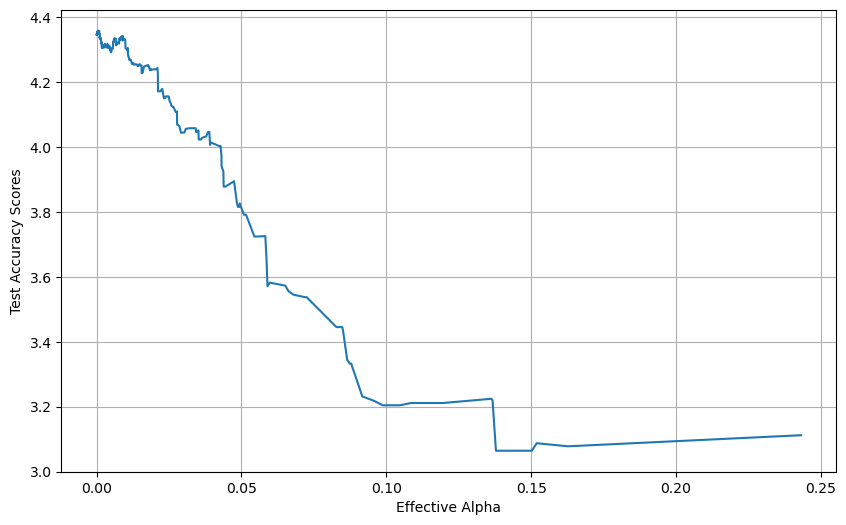

In [191]:
clf = tree.DecisionTreeRegressor()
path = clf.cost_complexity_pruning_path(X3_train, y3_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeRegressor(random_state = 10, ccp_alpha = ccp_alpha)
    clf.fit(X3_train, y3_train)
    clfs.append(clf)
 
rmse = [np.sqrt(metrics.mean_squared_error(y3_test, clf.predict(X3_test))) for clf in clfs]
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], rmse[:-1])
plt.xlabel("Effective Alpha")
plt.ylabel("Test Accuracy Scores")

In [192]:
#Tree Regression Model (mortality):
y4_train = train_setm['Risk Adjusted Rate']
X4_train = train_setm[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]
y4_test = test_setm['Risk Adjusted Rate']
X4_test = test_setm[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]

regressor4 = DecisionTreeRegressor(max_depth = 3, ccp_alpha = 0, random_state = 40)
regressor4.fit(X4_train, y4_train)
y4_pred = regressor4.predict(X4_test)
mse4 = mean_squared_error(y4_test, y4_pred)
print("Mean Squared Error: ", mse4)

Mean Squared Error:  13.61338236297139


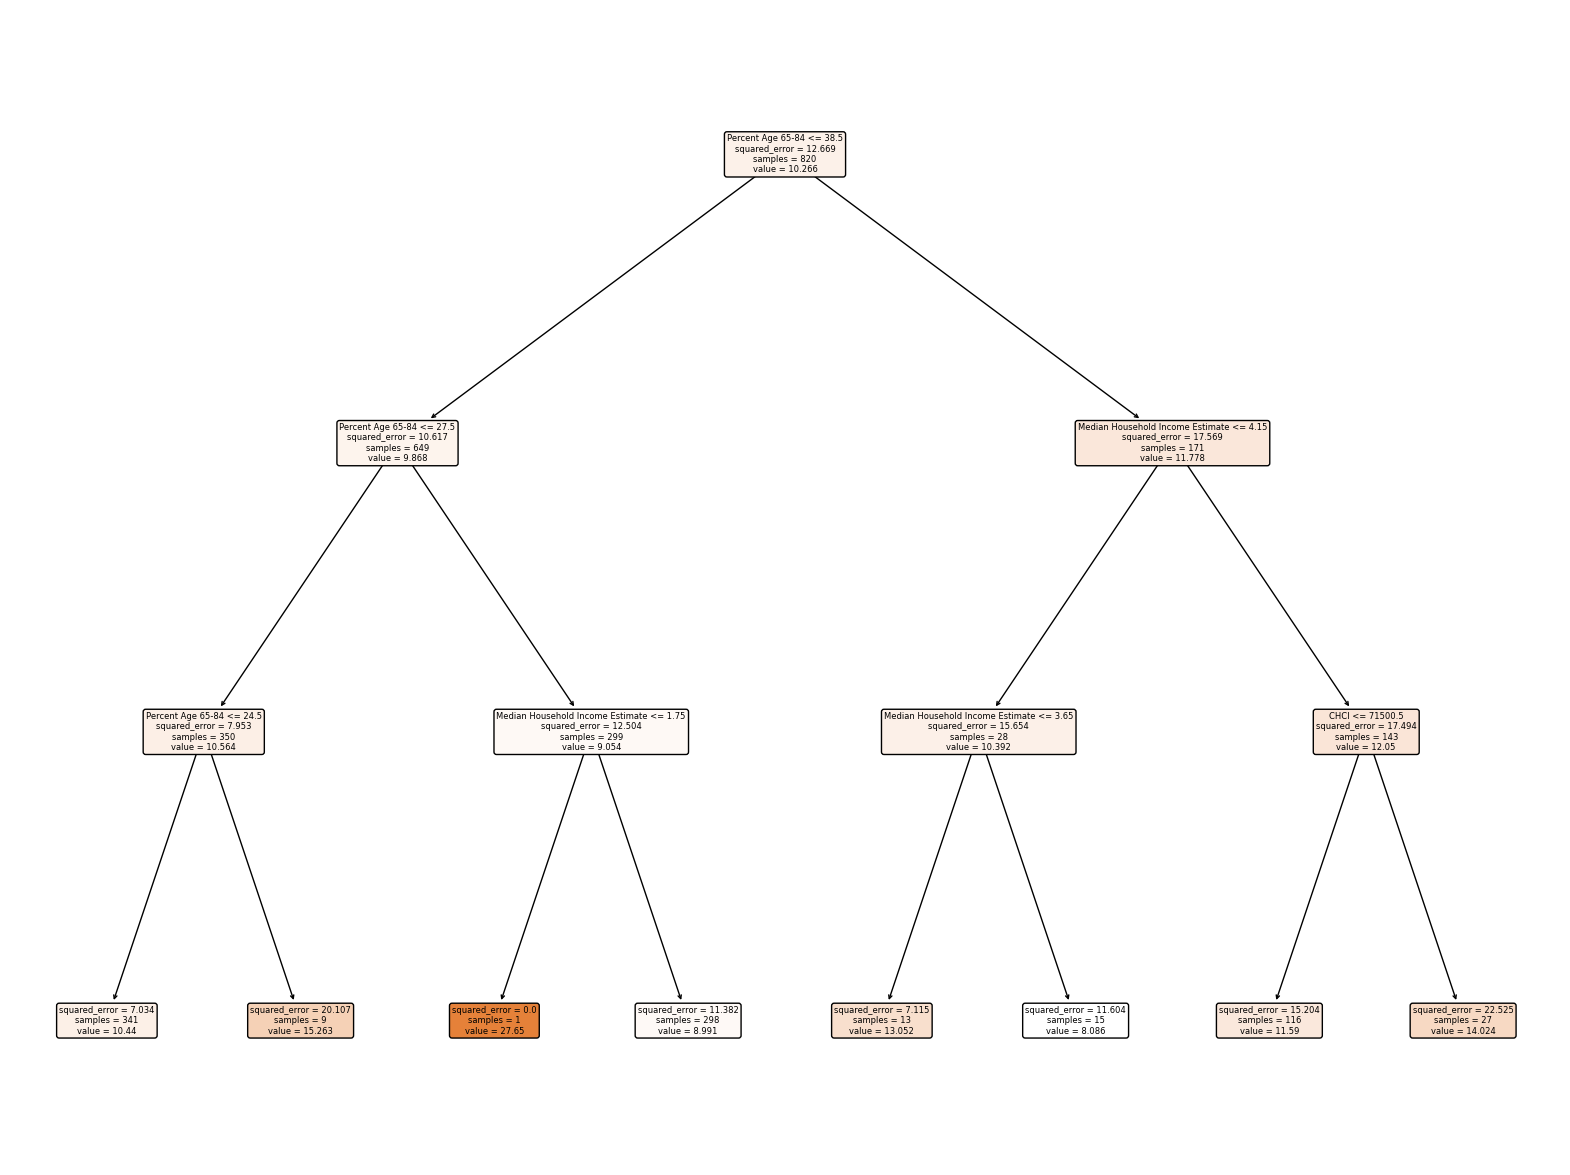

In [193]:
#Plot tree.
plt.figure(figsize = (20, 15))
plot_tree(regressor4, feature_names = feature_namesm, filled = True, rounded = True);

Text(0.5, 0, 'Effective Alpha')

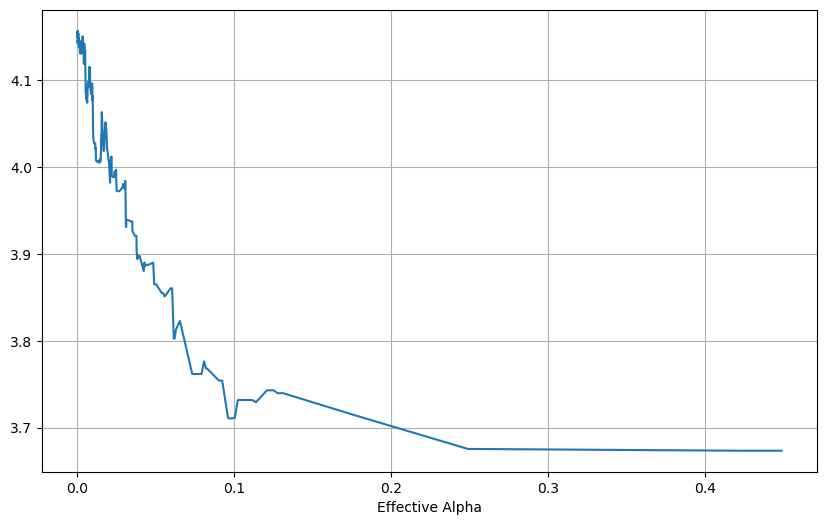

In [194]:
clf = tree.DecisionTreeRegressor()
path = clf.cost_complexity_pruning_path(X4_train, y4_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeRegressor(random_state = 10, ccp_alpha = ccp_alpha)
    clf.fit(X4_train, y4_train)
    clfs.append(clf)
 
rmse = [np.sqrt(metrics.mean_squared_error(y4_test, clf.predict(X4_test))) for clf in clfs]
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], rmse[:-1])
plt.xlabel("Effective Alpha")

In [195]:
#Random Forest Model (readmissions):
y5_train = train_setr['Risk Adjusted Rate']
X5_train = train_setr[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]
y5_test = test_setr['Risk Adjusted Rate']
X5_test = test_setr[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]

regressor5 = RandomForestRegressor(n_estimators = 500, max_depth = 5, random_state = 37)
regressor5.fit(X5_train, y5_train)

#Make predictions on the test set.
y5_pred = regressor5.predict(X5_test)

#Evaluate the performance of the model using mean squared error.
mse5 = mean_squared_error(y5_test, y5_pred)
print("Mean squared error:", mse5)

Mean squared error: 9.215995611669683


In [196]:
#Random Forest Model (mortality):
y6_train = train_setm['Risk Adjusted Rate']
X6_train = train_setm[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]
y6_test = test_setm['Risk Adjusted Rate']
X6_test = test_setm[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]

regressor6 = RandomForestRegressor(n_estimators = 500, max_depth = 5, random_state = 37)
regressor6.fit(X6_train, y6_train)

#Make predictions on the test set.
y6_pred = regressor6.predict(X6_test)

#Evaluate the performance of the model using mean squared error.
mse6 = mean_squared_error(y6_test, y6_pred)
print("Mean squared error:", mse5)

Mean squared error: 9.215995611669683


In [197]:
#XGBoost Model (readmissions):
y7_train = train_setr['Risk Adjusted Rate']
X7_train = train_setr[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]
y7_test = test_setr['Risk Adjusted Rate']
X7_test = test_setr[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]

#Define the XGBoost model parameters.
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'learning_rate': 0.08,
}

#Create an XGBRegressor object and fit it to the training data.
regressor7 = XGBRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 42)
regressor7.fit(X7_train, y7_train)

#Make predictions on the test set.
y_pred7 = regressor7.predict(X7_test)

#Evaluate the model using mean squared error (MSE).
mse7 = mean_squared_error(y7_test, y_pred7)
print("MSE:", mse7)

MSE: 10.159588388369476


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

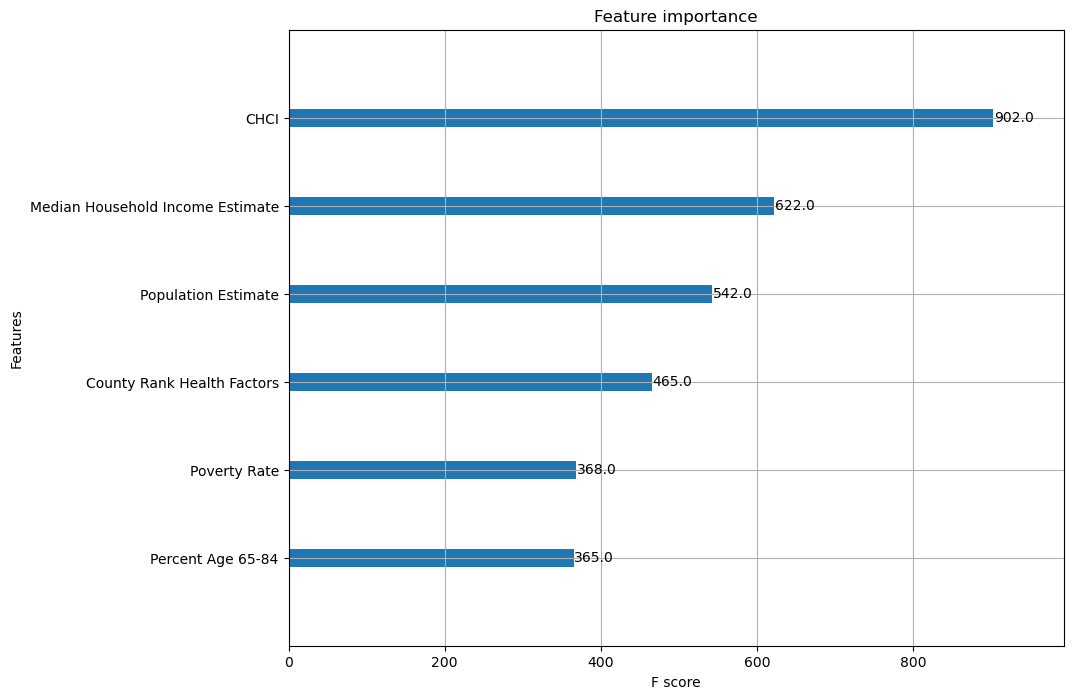

In [198]:
#Plot feature importance chart.
fig, ax = plt.subplots(figsize = (10,8))
plot_importance(regressor7, ax = ax)

In [199]:
#XGBoost Model(mortality):
y8_train = train_setm['Risk Adjusted Rate']
X8_train = train_setm[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]
y8_test = test_setm['Risk Adjusted Rate']
X8_test = test_setm[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]

#Define the XGBoost model parameters.
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'learning_rate': 0.08,
}

#Create an XGBRegressor object and fit it to the training data.
regressor8 = XGBRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 42)
regressor8.fit(X8_train, y8_train)

#Make predictions on the test set.
y_pred8 = regressor8.predict(X8_test)

#Evaluate the model using mean squared error (MSE).
mse8 = mean_squared_error(y8_test, y_pred8)
print("MSE:", mse8)

MSE: 11.971616214661138


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

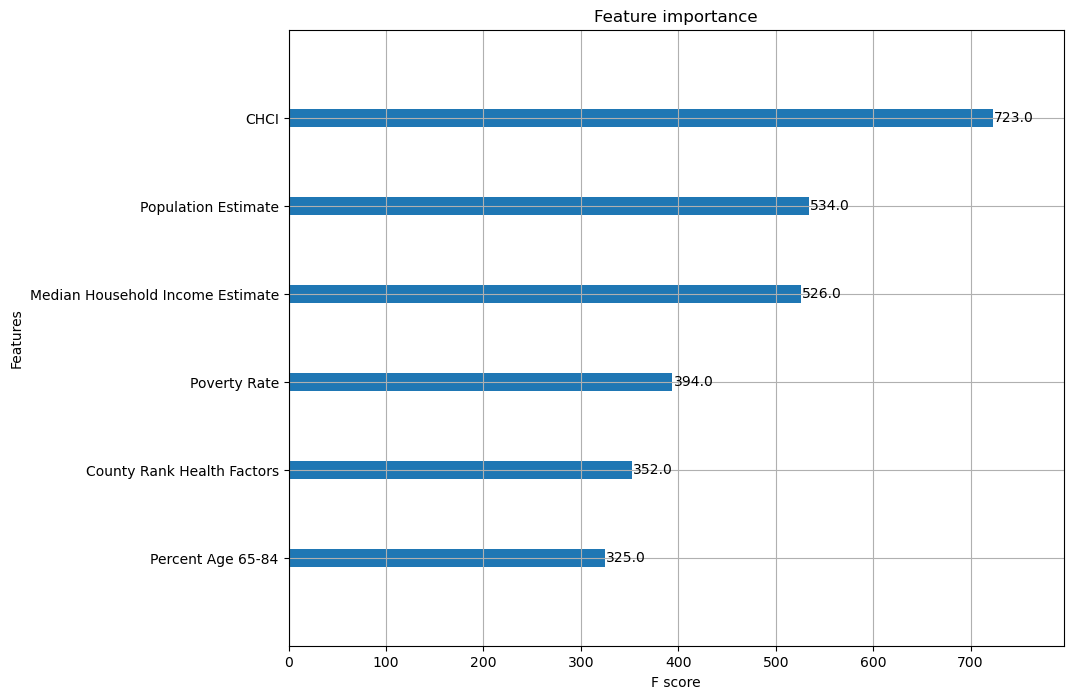

In [200]:
#Plot feature importance chart.
fig, ax = plt.subplots(figsize = (10,8))
plot_importance(regressor8, ax = ax)

In [234]:
#Summary statistics (Readmissions):
yr = readmissions['Risk Adjusted Rate']
Xr = readmissions[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]

yr_train = train_setr['Risk Adjusted Rate']
Xr_train = train_setr[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]
yr_test = test_setr['Risk Adjusted Rate']
Xr_test = test_setr[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]

names = ["Linear", "Tree", "RF", "XGB"] 

classifiers = [LinearRegression(), DecisionTreeRegressor(random_state = 31, ccp_alpha = 5),
               RandomForestRegressor(n_estimators = 500, max_depth = 5, random_state = 37),
               XGBRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 42)]

print('Model  CV    MSE     RMSE     R2') 
for name , clf in zip(names , classifiers): 
    clf.fit(Xr_train , yr_train) 
    yr_pred = clf.predict(Xr_test)

    kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
    cv = cross_val_score(clf, Xr_test, yr_test, scoring = 'neg_mean_squared_error', cv = kfold)
    cv_mean = -1 * cv.mean()    

    mse = metrics.mean_squared_error(yr_test, yr_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(yr_test, yr_pred)

    print('{:6} {:3.3f} {:3.3f} {:3.3f} {:3.3f}'.format(name, cv_mean, mse, rmse, r2))

Model  CV    MSE     RMSE     R2
Linear 9.690 9.815 3.133 -0.037
Tree   9.574 9.762 3.124 -0.031
RF     9.925 9.216 3.036 0.026
XGB    12.829 10.160 3.187 -0.073


In [235]:
#Summary statistics (Mortality):
ym = mortality['Risk Adjusted Rate']
Xm = mortality[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]

ym_train = train_setm['Risk Adjusted Rate']
Xm_train = train_setm[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]
ym_test = test_setm['Risk Adjusted Rate']
Xm_test = test_setm[['CHCI', 'Median Household Income Estimate', 'Poverty Rate', 'Population Estimate', 'Percent Age 65-84', 
                  'County Rank Health Factors']]

names = ["Linear", "Tree", "RF", "XGB"] 

classifiers = [LinearRegression(), DecisionTreeRegressor(random_state = 31, ccp_alpha = 5),
               RandomForestRegressor(n_estimators = 500, max_depth = 5, random_state = 37),
               XGBRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 42)]

print('Model  CV    MSE     RMSE     R2') 
for name , clf in zip(names , classifiers): 
    clf.fit(Xm_train , ym_train) 
    ym_pred = clf.predict(Xm_test)

    kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
    cv = cross_val_score(clf, Xm_test, ym_test, scoring = 'neg_mean_squared_error', cv = kfold)
    cv_mean = -1 * cv.mean()    

    mse = metrics.mean_squared_error(ym_test, ym_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(ym_test, ym_pred)

    print('{:6} {:3.3f} {:3.3f} {:3.3f} {:3.3f}'.format(name, cv_mean, mse, rmse, r2))

Model  CV    MSE     RMSE     R2
Linear 14.498 14.092 3.754 0.006
Tree   14.229 14.215 3.770 -0.003
RF     13.673 12.648 3.556 0.107
XGB    17.018 11.972 3.460 0.155


In [203]:
#Run linear Regression, Regression Rree, Random Forest, XGBoost Regression models for readmissions and mortality data but
#add factor variables into model (County, Hospital).
#Change County, Hospital, and Year variables to categorical type for both readmissions and mortality data frames. 
readmissions = pd.get_dummies(readmissions, columns = ['Hospital', 'County'], drop_first = True)
mortality = pd.get_dummies(mortality, columns = ['Hospital', 'County'], drop_first = True)
columns_to_drop = ['Latitude', 'Longitude', 'Zipcode', 'OSHPDID', 'Capacity (Number of Beds)', 'Measure', 'Entity Type',
'Number of 30 Day Readmissions/Deaths', 'Number of Total Admissions', 'Risk Adjusted Rate', 'Hospital Ratings',
'County Rank Health Outcomes', 'Year']

trainr2 = (readmissions['Year'].isin(['2011-2012', '2012-2013', '2013-2014']))
testr2 = (readmissions['Year'] == '2014-2015')
train_setr2 = readmissions[trainr2]
test_setr2 = readmissions[testr2]

trainm2 = (mortality['Year'].isin(['2011-2012', '2012-2013', '2013-2014']))
testm2 = (mortality['Year'] == '2014-2015')
train_setm2 = mortality[trainm2]
test_setm2 = mortality[testm2]

In [204]:
#Linear Regression Model (readmissions):
y9_train = train_setr2['Risk Adjusted Rate']
X9_train = train_setr2.drop(columns = columns_to_drop, axis = 1)
y9_test = test_setr2['Risk Adjusted Rate']
X9_test = test_setr2.drop(columns = columns_to_drop, axis = 1)

X9_train = sm.add_constant(X9_train) 
lm9 = sm.OLS(y9_train, X9_train)
results9 = lm9.fit()
print(results9.summary()) #Adjusted R^2 = 0.60.

                            OLS Regression Results                            
Dep. Variable:     Risk Adjusted Rate   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     5.225
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           6.92e-60
Time:                        20:44:49   Log-Likelihood:                -1608.1
No. Observations:                 806   AIC:                             3786.
Df Residuals:                     521   BIC:                             5123.
Df Model:                         284                                         
Covariance Type:            nonrobust                                         
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [206]:
y10_train = train_setr2['Risk Adjusted Rate']
X10_train = train_setr2.drop(columns = columns_to_drop, axis = 1)
y10_test = test_setr2['Risk Adjusted Rate']
X10_test = test_setr2.drop(columns = columns_to_drop, axis = 1)

lm10 = LinearRegression() 
lm10 = lm10.fit(X10_train, y10_train)
y10_pred = lm10.predict(X10_test)
mse10 = mean_squared_error(y10_test, y10_pred)
print("Mean Squared Error: ", mse10)

Mean Squared Error:  10.11834755890167


In [208]:
#Linear Regression Model (mortality):
y11_train = train_setm2['Risk Adjusted Rate']
X11_train = train_setm2.drop(columns = columns_to_drop, axis = 1)
y11_test = test_setm2['Risk Adjusted Rate']
X11_test = test_setm2.drop(columns = columns_to_drop, axis = 1)

X11_train = sm.add_constant(X11_train) 
lm11 = sm.OLS(y11_train, X11_train)
results11 = lm11.fit()
print(results11.summary()) #Adjusted R^2 = 0.77.

                            OLS Regression Results                            
Dep. Variable:     Risk Adjusted Rate   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     6.273
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           4.54e-74
Time:                        20:52:37   Log-Likelihood:                -1596.9
No. Observations:                 820   AIC:                             3772.
Df Residuals:                     531   BIC:                             5133.
Df Model:                         288                                         
Covariance Type:            nonrobust                                         
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [209]:
y12_train = train_setm2['Risk Adjusted Rate']
X12_train = train_setm2.drop(columns = columns_to_drop, axis = 1)
y12_test = test_setm2['Risk Adjusted Rate']
X12_test = test_setm2.drop(columns = columns_to_drop, axis = 1)

lm12 = LinearRegression() 
lm12 = lm12.fit(X12_train, y12_train)
y12_pred = lm12.predict(X12_test)
mse12 = mean_squared_error(y12_test, y12_pred)
print("Mean Squared Error: ", mse12)

Mean Squared Error:  9.044189766902104


In [210]:
#Tree Regression Model (readmissions):
y13_train = train_setr2['Risk Adjusted Rate']
X13_train = train_setr2.drop(columns = columns_to_drop, axis = 1)
y13_test = test_setr2['Risk Adjusted Rate']
X13_test = test_setr2.drop(columns = columns_to_drop, axis = 1)

regressor13 = DecisionTreeRegressor(max_depth = 3, ccp_alpha = 0, random_state = 40)
regressor13.fit(X13_train, y13_train)
y13_pred = regressor13.predict(X13_test)
mse13 = mean_squared_error(y13_test, y13_pred)
print("Mean Squared Error: ", mse13)

Mean Squared Error:  9.951862782371343


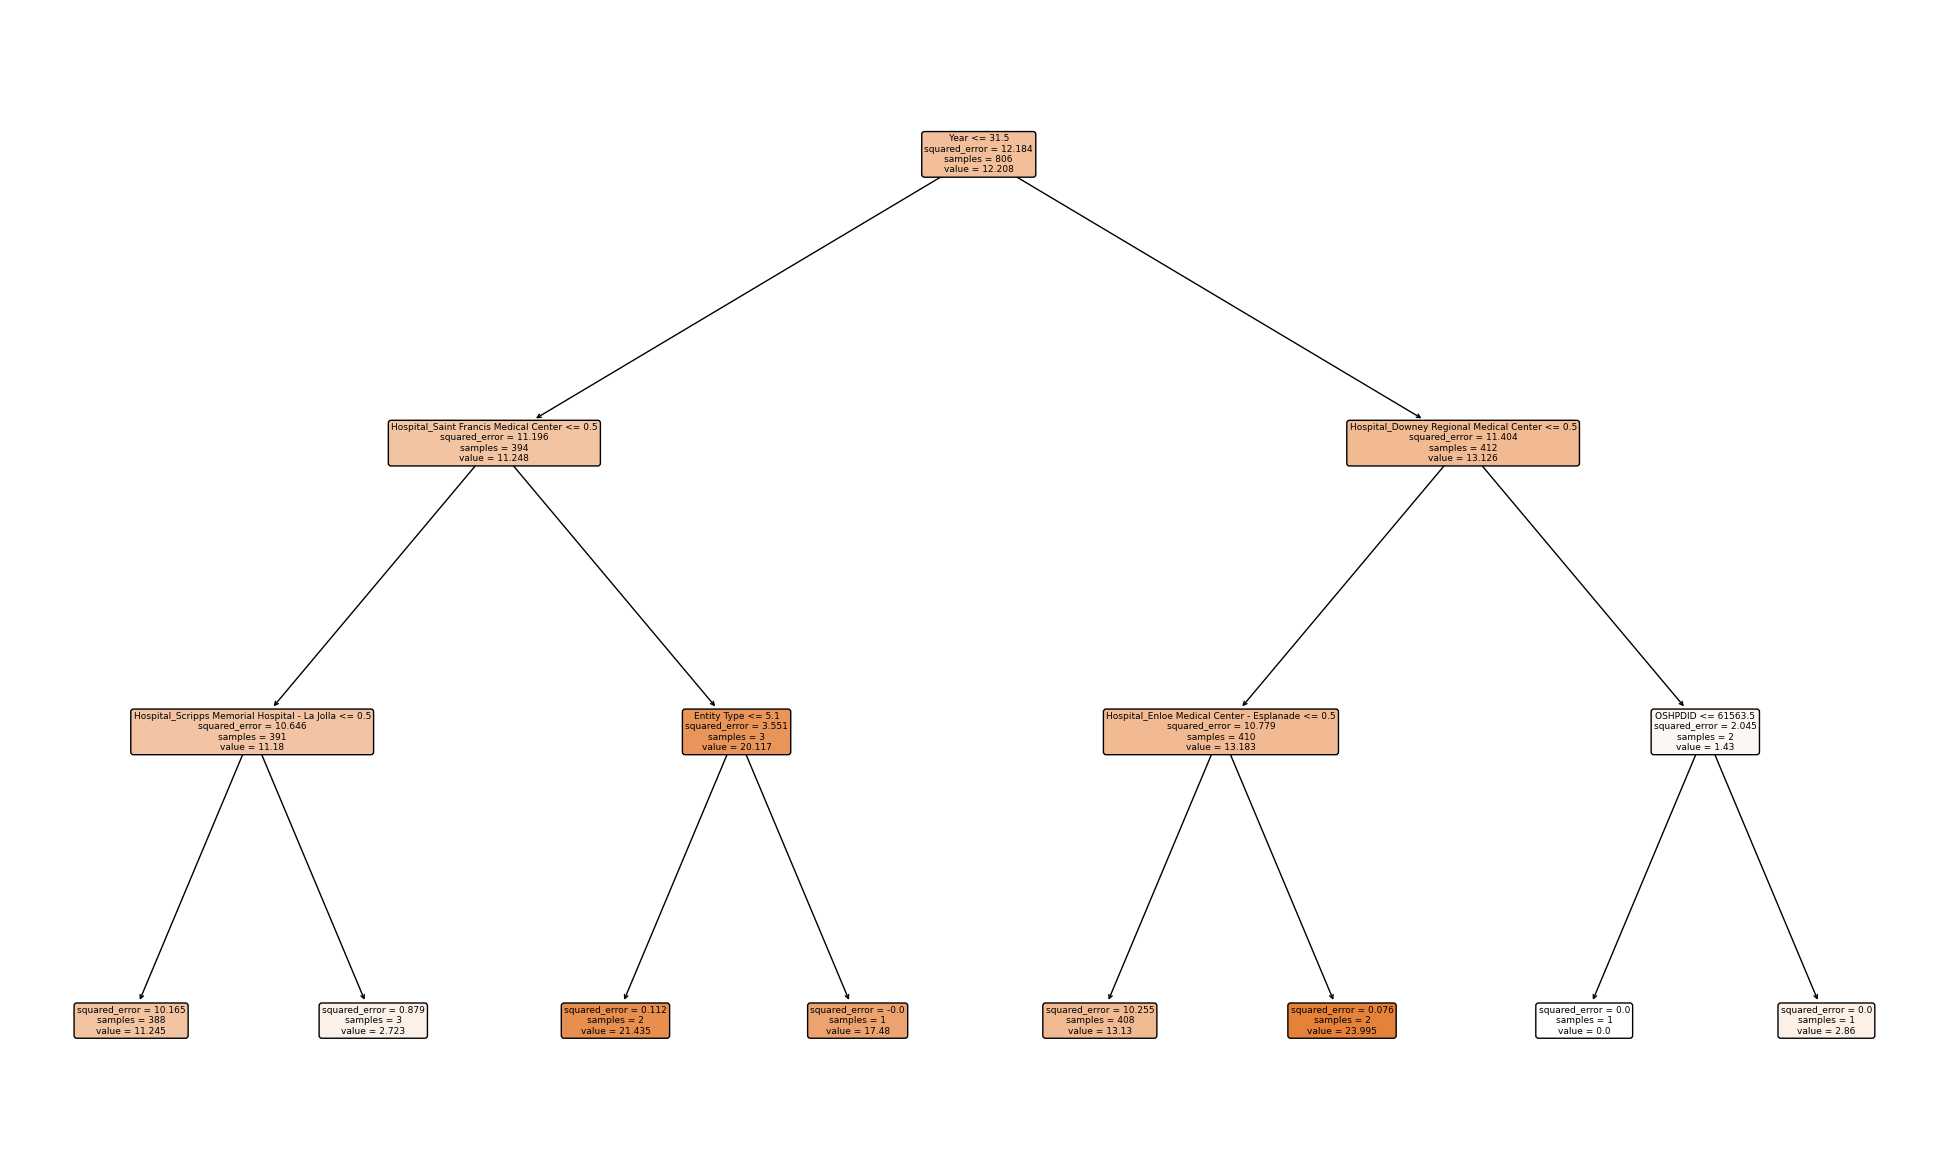

In [221]:
#Plot tree.
plt.figure(figsize = (25, 15))
plot_tree(regressor13, feature_names = readmissions.columns, filled = True, rounded = True);

In [214]:
#Tree Regression Model (mortality):
y14_train = train_setm2['Risk Adjusted Rate']
X14_train = train_setm2.drop(columns = columns_to_drop, axis = 1)
y14_test = test_setm2['Risk Adjusted Rate']
X14_test = test_setm2.drop(columns = columns_to_drop, axis = 1)

regressor14 = DecisionTreeRegressor(max_depth = 3, ccp_alpha = 0, random_state = 40)
regressor14.fit(X14_train, y14_train)
y14_pred = regressor14.predict(X14_test)
mse14 = mean_squared_error(y14_test, y14_pred)
print("Mean Squared Error: ", mse14)

Mean Squared Error:  11.572661238889324


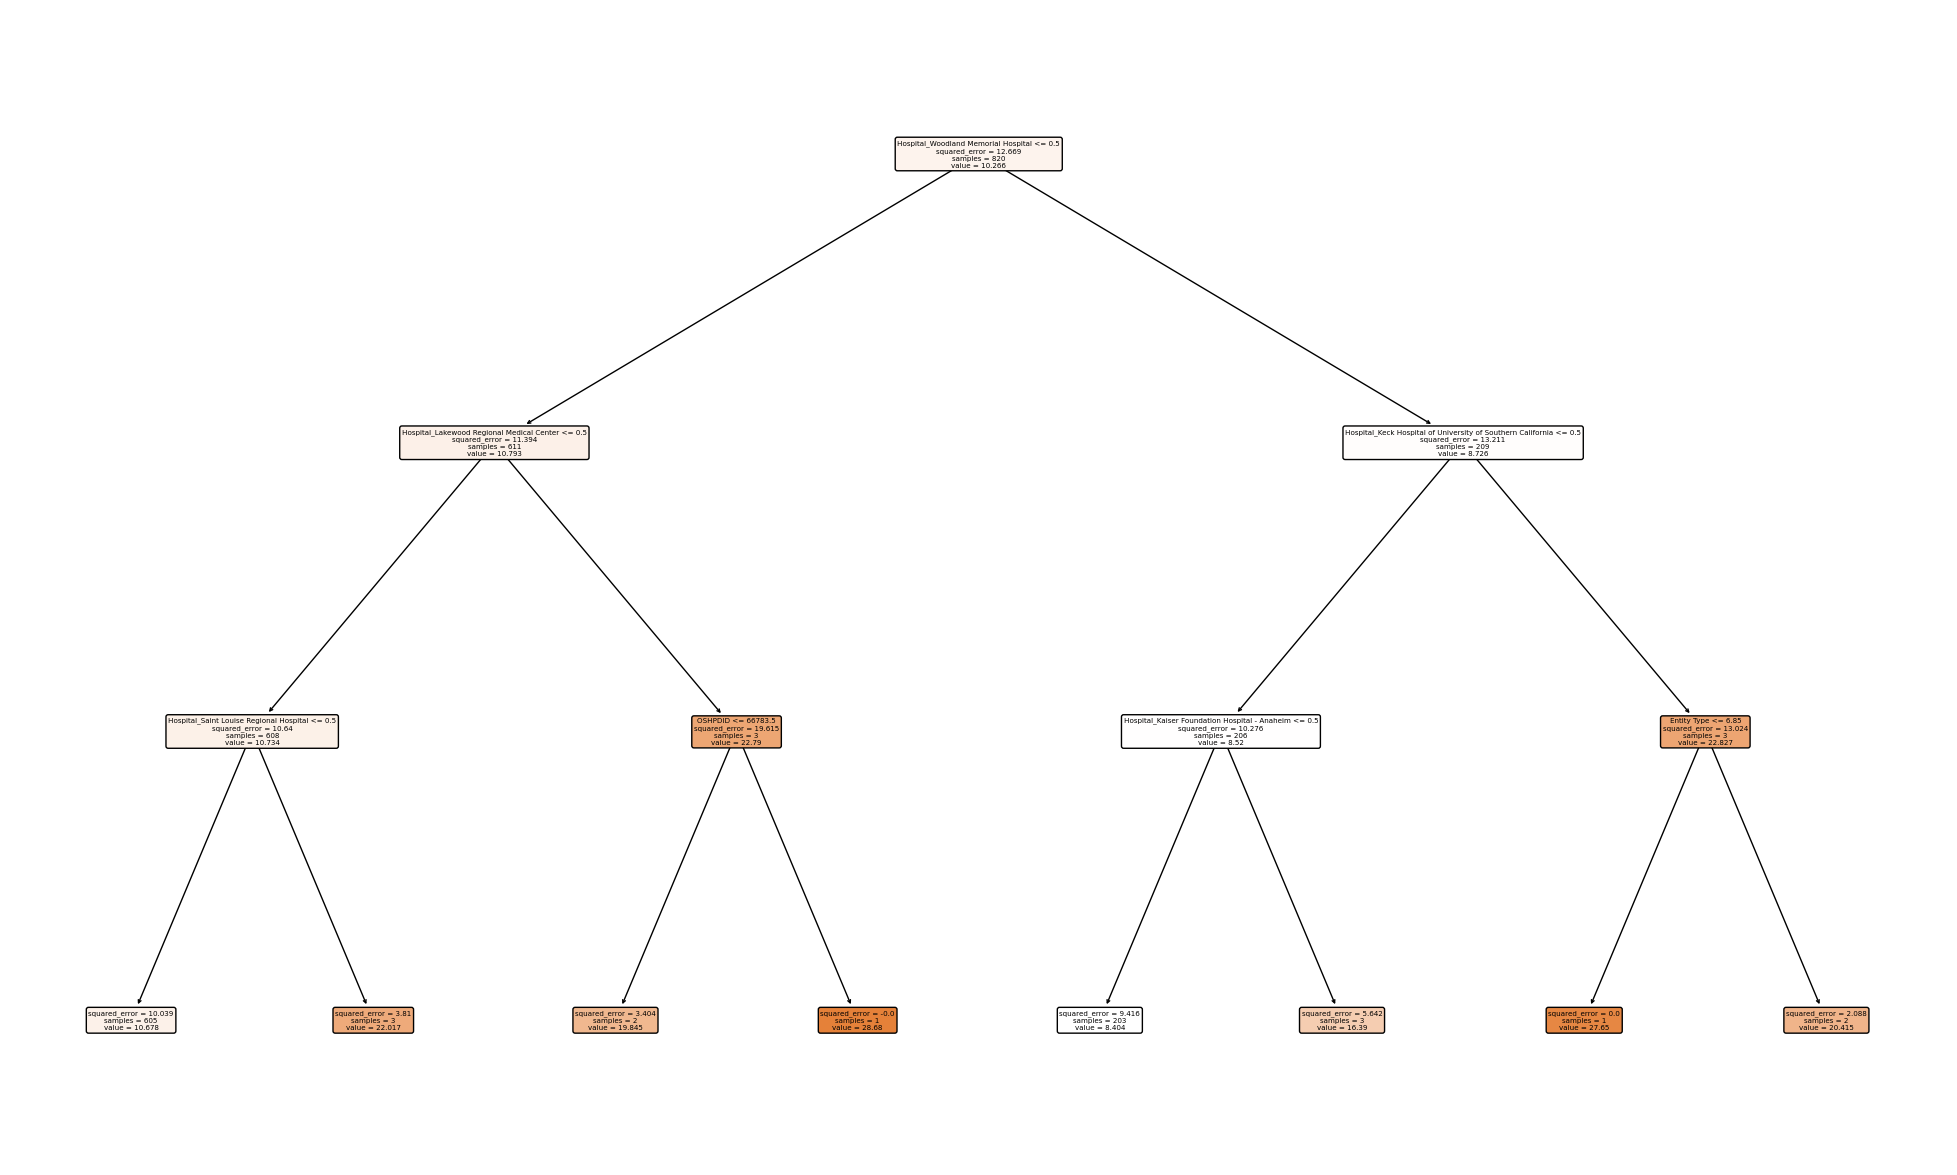

In [222]:
#Plot tree.
plt.figure(figsize = (25, 15))
plot_tree(regressor14, feature_names = mortality.columns, filled = True, rounded = True);

In [225]:
#Random Forest Model (readmissions):
y15_train = train_setr2['Risk Adjusted Rate']
X15_train = train_setr2.drop(columns = columns_to_drop, axis = 1)
y15_test = test_setr2['Risk Adjusted Rate']
X15_test = test_setr2.drop(columns = columns_to_drop, axis = 1)

regressor15 = RandomForestRegressor(n_estimators = 500, max_depth = 5, random_state = 37)
regressor15.fit(X15_train, y15_train)

#Make predictions on the test set.
y15_pred = regressor15.predict(X15_test)

#Evaluate the performance of the model using mean squared error.
mse15 = mean_squared_error(y15_test, y15_pred)
print("Mean squared error:", mse15)

Mean squared error: 9.09961327402369


In [226]:
#Random Forest Model (mortality):
y16_train = train_setm2['Risk Adjusted Rate']
X16_train = train_setm2.drop(columns = columns_to_drop, axis = 1)
y16_test = test_setm2['Risk Adjusted Rate']
X16_test = test_setm2.drop(columns = columns_to_drop, axis = 1)

regressor16 = RandomForestRegressor(n_estimators = 500, max_depth = 5, random_state = 37)
regressor16.fit(X16_train, y16_train)

#Make predictions on the test set.
y16_pred = regressor16.predict(X16_test)

#Evaluate the performance of the model using mean squared error.
mse16 = mean_squared_error(y16_test, y16_pred)
print("Mean squared error:", mse16)

Mean squared error: 11.065483273748484


In [227]:
#XGBoost Model (readmissions):
y17_train = train_setr2['Risk Adjusted Rate']
X17_train = train_setr2.drop(columns = columns_to_drop, axis = 1)
y17_test = test_setr2['Risk Adjusted Rate']
X17_test = test_setr2.drop(columns = columns_to_drop, axis = 1)

#Define the XGBoost model parameters.
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'learning_rate': 0.08,
}

#Create an XGBRegressor object and fit it to the training data.
regressor17 = XGBRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 42)
regressor17.fit(X17_train, y17_train)

#Make predictions on the test set.
y_pred17 = regressor17.predict(X17_test)

#Evaluate the model using mean squared error (MSE).
mse17 = mean_squared_error(y17_test, y_pred17)
print("MSE:", mse17)

MSE: 8.839454357637292


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

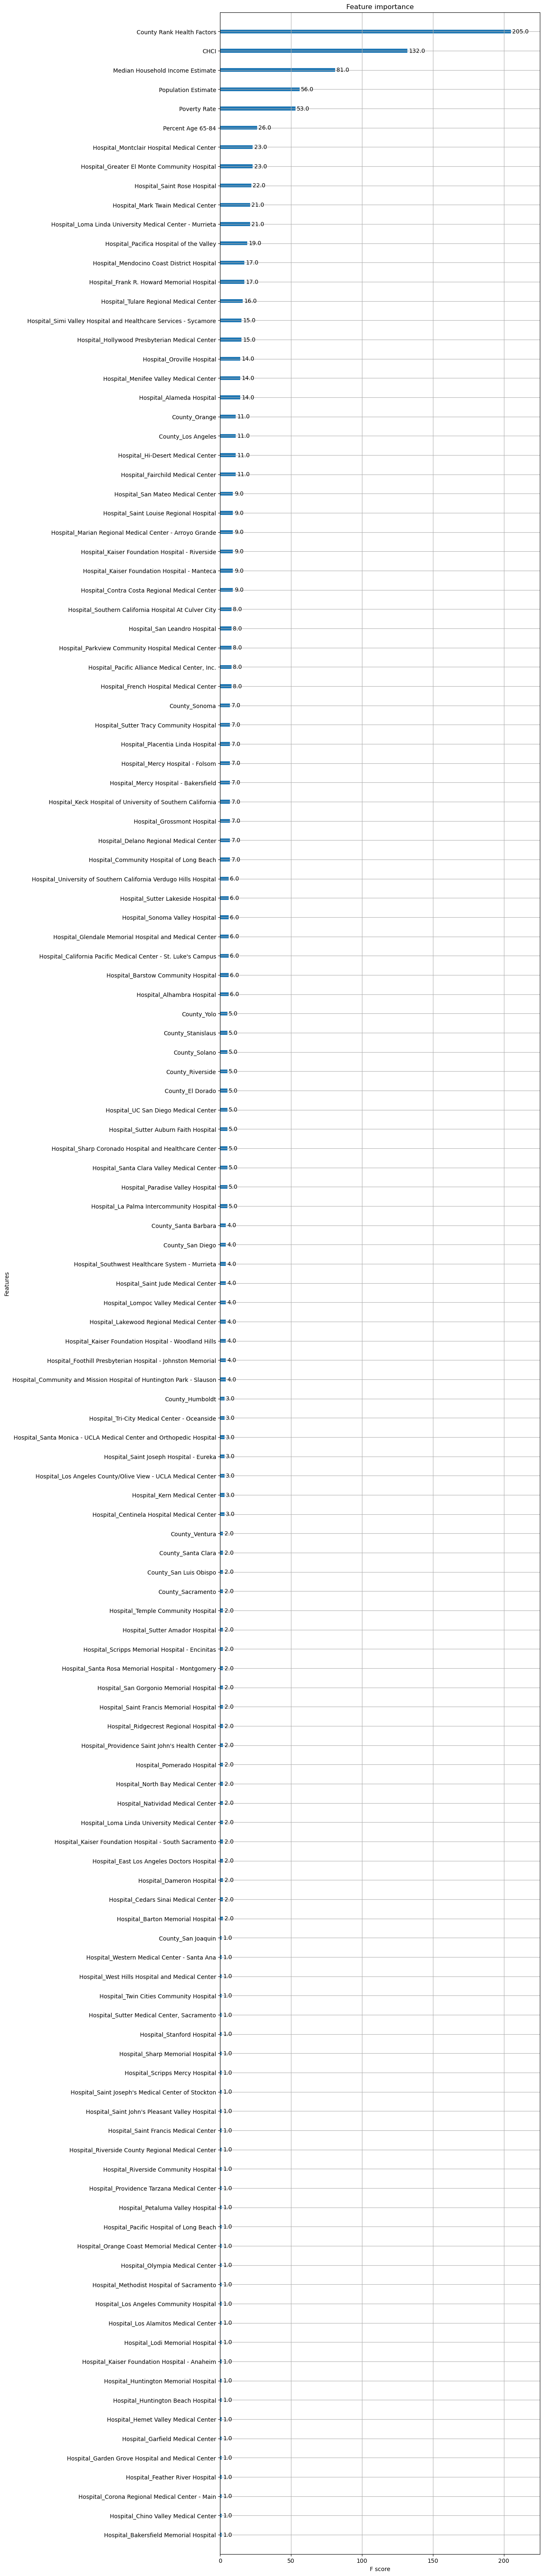

In [229]:
#Plot feature importance chart.
fig, ax = plt.subplots(figsize = (10, 80))
plot_importance(regressor17, ax = ax)

In [230]:
#XGBoost Model (mortality):
y18_train = train_setm2['Risk Adjusted Rate']
X18_train = train_setm2.drop(columns = columns_to_drop, axis = 1)
y18_test = test_setm2['Risk Adjusted Rate']
X18_test = test_setm2.drop(columns = columns_to_drop, axis = 1)

#Define the XGBoost model parameters.
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'learning_rate': 0.08,
}

#Create an XGBRegressor object and fit it to the training data.
regressor18 = XGBRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 42)
regressor18.fit(X18_train, y18_train)

#Make predictions on the test set.
y_pred18 = regressor18.predict(X18_test)

#Evaluate the model using mean squared error (MSE).
mse18 = mean_squared_error(y18_test, y_pred18)
print("MSE:", mse18)

MSE: 9.216558404841054


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

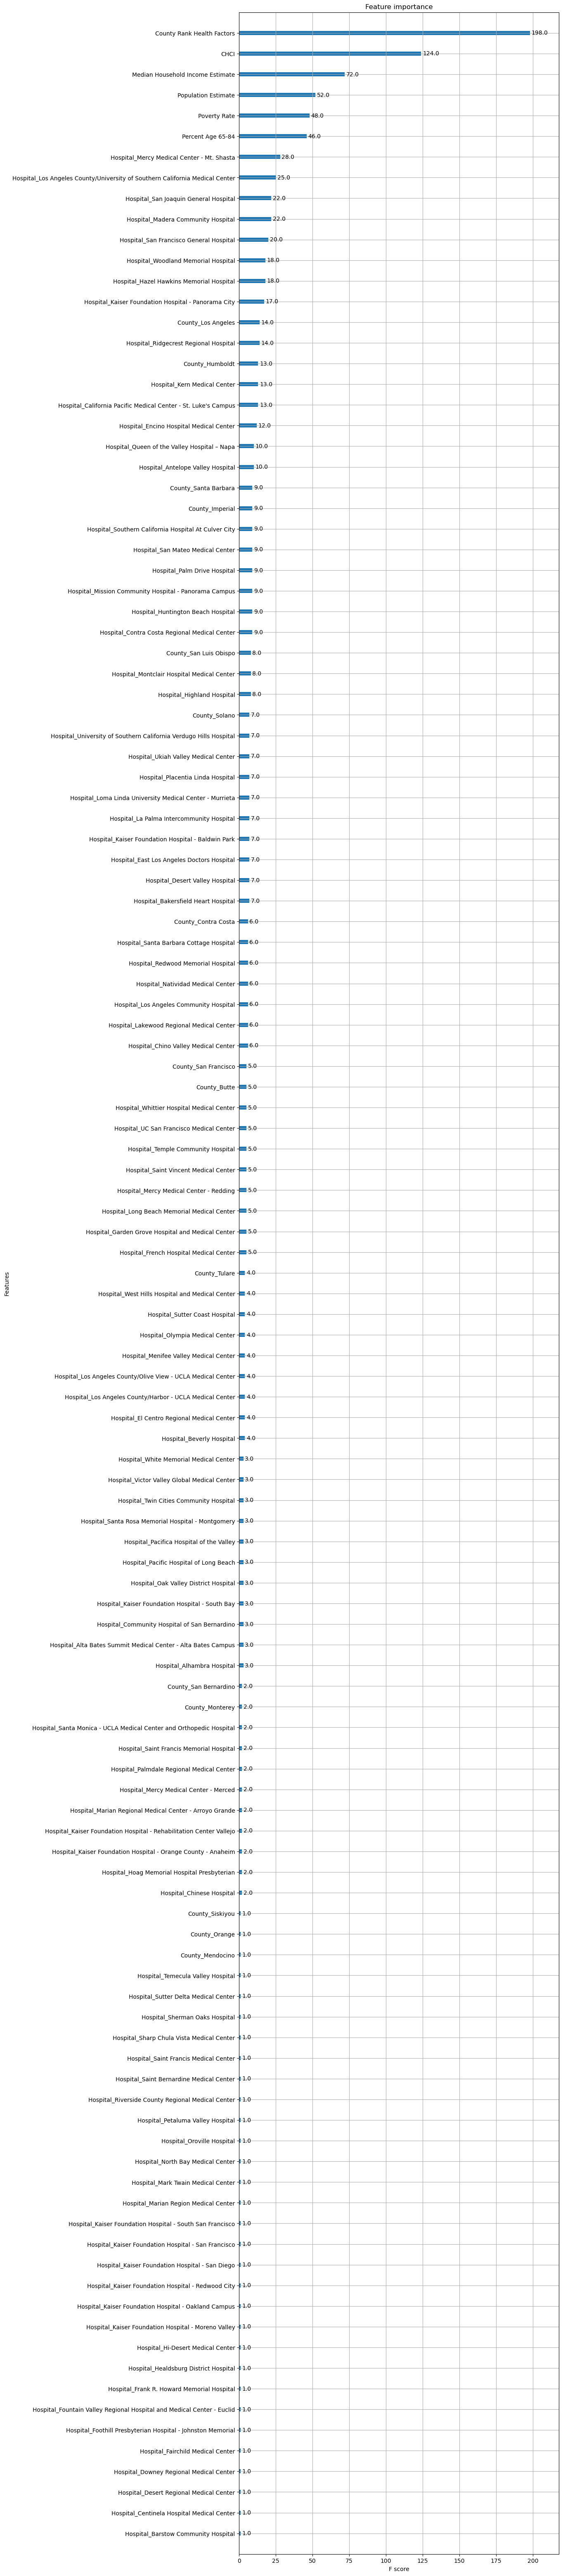

In [231]:
#Plot feature importance chart.
fig, ax = plt.subplots(figsize = (10, 80))
plot_importance(regressor18, ax = ax)

In [233]:
#Summary statistics (Readmissions):
yr2 = readmissions['Risk Adjusted Rate']
Xr2 = readmissions.drop(columns = columns_to_drop, axis = 1)

yr_train2 = train_setr2['Risk Adjusted Rate']
Xr_train2 = train_setr2.drop(columns = columns_to_drop, axis = 1)

yr_test2 = test_setr2['Risk Adjusted Rate']
Xr_test2 = test_setr2.drop(columns = columns_to_drop, axis = 1)

names = ["Linear", "Tree", "RF", "XGB"] 

classifiers = [LinearRegression(), DecisionTreeRegressor(random_state = 31, ccp_alpha = 5),
               RandomForestRegressor(n_estimators = 500, max_depth = 5, random_state = 37),
               XGBRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 42)]

print('Model  CV    MSE     RMSE     R2') 
for name , clf in zip(names , classifiers): 
    clf.fit(Xr_train2 , yr_train2) 
    yr_pred2 = clf.predict(Xr_test2)

    kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
    cv = cross_val_score(clf, Xr_test2, yr_test2, scoring = 'neg_mean_squared_error', cv = kfold)
    cv_mean = -1 * cv.mean()    

    mse = metrics.mean_squared_error(yr_test2, yr_pred2)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(yr_test2, yr_pred2)

    print('{:6} {:3.3f} {:3.3f} {:3.3f} {:3.3f}'.format(name, cv_mean, mse, rmse, r2))

Model  CV    MSE     RMSE     R2
Linear 11.627 10.118 3.181 -0.069
Tree   9.574 9.762 3.124 -0.031
RF     9.495 9.100 3.017 0.039
XGB    10.876 8.839 2.973 0.066


In [236]:
#Summary statistics (Mortality):
ym2 = mortality['Risk Adjusted Rate']
Xm2 = mortality.drop(columns = columns_to_drop, axis = 1)

ym_train2 = train_setm2['Risk Adjusted Rate']
Xm_train2 = train_setm2.drop(columns = columns_to_drop, axis = 1)

ym_test2 = test_setm2['Risk Adjusted Rate']
Xm_test2 = test_setm2.drop(columns = columns_to_drop, axis = 1)

names = ["Linear", "Tree", "RF", "XGB"] 

classifiers = [LinearRegression(), DecisionTreeRegressor(random_state = 31, ccp_alpha = 5),
               RandomForestRegressor(n_estimators = 500, max_depth = 5, random_state = 37),
               XGBRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 42)]

print('Model  CV    MSE     RMSE     R2') 
for name , clf in zip(names , classifiers): 
    clf.fit(Xm_train2 , ym_train2) 
    ym_pred2 = clf.predict(Xm_test2)

    kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
    cv = cross_val_score(clf, Xm_test2, ym_test2, scoring = 'neg_mean_squared_error', cv = kfold)
    cv_mean = -1 * cv.mean()    

    mse = metrics.mean_squared_error(ym_test2, ym_pred2)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(ym_test2, ym_pred2)

    print('{:6} {:3.3f} {:3.3f} {:3.3f} {:3.3f}'.format(name, cv_mean, mse, rmse, r2))

Model  CV    MSE     RMSE     R2
Linear 13.176 9.044 3.007 0.362
Tree   14.229 14.215 3.770 -0.003
RF     13.273 11.065 3.326 0.219
XGB    14.437 9.217 3.036 0.350
